# Qiskit Certification Prep - Module 2.1: Visualize Quantum Circuits

In [1]:
import qiskit
import numpy as np
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, IBMQ
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import circuit_drawer

## Section 0: Drawing circuits

*Drawing circuits:*
This is the first skill we'll learn because it'll help learn everything else in this section.
There are 2 options for drawing circuits: 

1). mpl 

2). text 

**mpl:**
- requires matplotlib to be installed

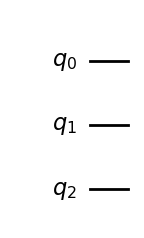

In [2]:
qc = QuantumCircuit(3)
qc.draw(output ='mpl') # mpl -> matplotlib

**Text**

In [3]:
qc = QuantumCircuit(3)
qc.draw(output = 'text')

q_0: 
     
q_1: 
     
q_2:

## Section 1: Creating Circuits

### Different ways to create a circuit with 2 qubits and 2 classical bits

| Method | Code |
|--------|------|
| Basic constructor | `qc = QuantumCircuit(2, 2)` |
| Using registers | `qr = QuantumRegister(2); cr = ClassicalRegister(2); qc = QuantumCircuit(qr, cr)` |
| Named registers | `qr = QuantumRegister(2, 'q'); cr = ClassicalRegister(2, 'c'); qc = QuantumCircuit(qr, cr)` 

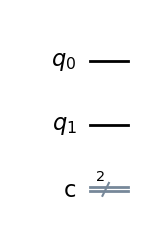

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(2, name='c')
qc = QuantumCircuit(qr, cr)
qc.draw('mpl')

## Section 2: Constructing Multi-Qubit Quantum Registers


Use `QuantumRegister` and `ClassicalRegister` to build registers and assemble them into a circuit.

There are **three common methods** to create multi-qubit (and matching classical) registers in Qiskit:

1. **Shorthand constructor**
2. **Explicit register objects**
3. **Create then add registers**

All three methods produce equivalent circuits; choose the style that best suits your workflow.

Method 1:


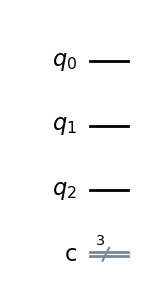

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Method 1: Shorthand constructor
qc1 = QuantumCircuit(3, 3)
print('Method 1:')
display(qc1.draw('mpl'))

Method 2:


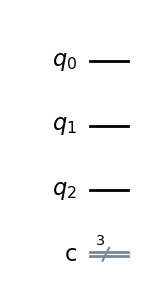

In [6]:
# Method 2: Explicit register objects
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
qc2 = QuantumCircuit(qr, cr)
print('Method 2:')
display(qc2.draw('mpl'))


Method 3:


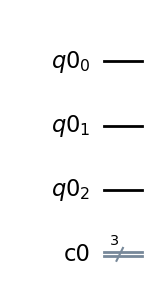

In [7]:
# Method 3: Create and then add registers
qr3 = QuantumRegister(3)
cr3 = ClassicalRegister(3)
qc3 = QuantumCircuit()
qc3.add_register(qr3)
qc3.add_register(cr3)
print('Method 3:')
display(qc3.draw('mpl'))

## Section 3: Gates and Measurements

### Different ways to apply gates and measure qubits

Most examples here use a 2-qubit circuit for consistency, but many operations (like applying H or measurement) work for circuits of size 1 or more.

| Operation | No. of Qubits Applied to | Method 1 | Method 2 |
|-----------|---------------|----------|----------|
| Apply H to qubit 0 | 1+ qubits (shown here for 1 qubit) | `qc.h(0)` | `qc.append(HGate(), [0])` |
| Apply CX from 0 to 1 | 2 qubits | `qc.cx(0, 1)` | `qc.append(CXGate(), [0, 1])` |
| Measure qubits to classical bits | 1+ qubits (shown here for 2 qubits) | `qc.measure([0,1], [0,1])` | `qc.measure_all()` |

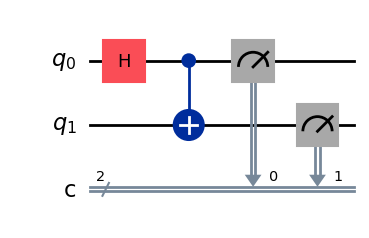

In [8]:
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])
qc.draw('mpl')

## Section 4: Circuit Properties

### Ways to inspect circuit characteristics

| Property | Code |
|----------|------|
| Gate counts | `qc.count_ops()` |
| Circuit depth | `qc.depth()` |
| Number of qubits | `qc.num_qubits` |
| Circuit width | `qc.width()` 

In [9]:
print("Depth:", qc.depth())
print("Width:", qc.width())
print("Operations:", qc.count_ops())

Depth: 3
Width: 4
Operations: OrderedDict({'measure': 2, 'h': 1, 'cx': 1})


## Section 5: Subcircuits

### Ways to build and reuse subcircuits

| Operation | Code |
|-----------|------|
| Define subcircuit | `sub = QuantumCircuit(2); sub.h(0); sub.cx(0, 1)` |
| Append subcircuit | `qc.append(sub.to_instruction(), [0, 1])` |
| Reuse with name | `QuantumCircuit(2, name='sub')` 

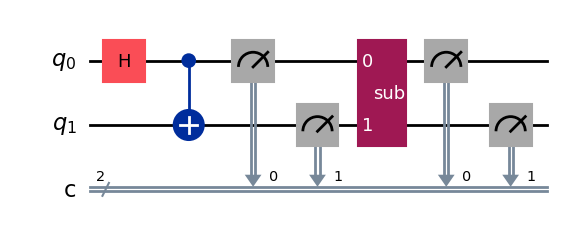

In [10]:
sub = QuantumCircuit(2, name="sub")
sub.h(0)
sub.cx(0, 1)
qc.append(sub.to_instruction(), [0, 1])
qc.measure([0,1], [0,1])
qc.draw('mpl')

## Section 6: Exporting and Importing QASM

### Exporting and importing circuit definitions
Assume that `qc` is an instance of class `QuantumCircuit`

| Task | Code |
|------|------|
| Export QASM | `qasm3_str = dumps(qc)                # serialize to OpenQASM 3. Returns a string` |
| Import from string | `qc_from_qasm3 = loads(qasm3_str)  # parse back into a QuantumCircuit` |
| Import from file | `qc = load("path/to/your_file.qasm")   # reads from a .qasm file` 

OPENQASM 3.0;
include "stdgates.inc";
bit[2] c;
qubit[2] q;
h q[0];
cx q[0], q[1];
c[0] = measure q[0];
c[1] = measure q[1];
 ...



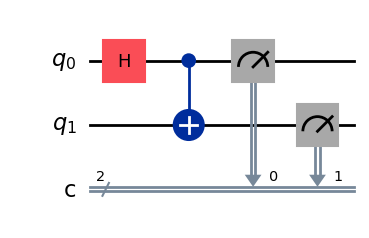

In [12]:
from qiskit import QuantumCircuit

# example circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# --- OpenQASM 3 round-trip ---
from qiskit.qasm3 import dumps, loads

qasm3_str = dumps(qc)                # serialize to OpenQASM 3. Returns a string
print(qasm3_str[:300], "...\n")      # preview

qc_from_qasm3 = loads(qasm3_str)     # parse back into a QuantumCircuit

# visualize (mpl requires matplotlib)
qc_from_qasm3.draw("mpl")


## Section 7: Try It Yourself Prompts

### Exercises for students to practice

1. Add a `t` gate to qubit 1 and redraw the circuit.
2. Create a new 3-qubit circuit and apply a Toffoli gate (`ccx`).
3. Export the circuit to QASM and re-import it. Verify equality.
4. Use `count_ops()` and interpret the results.
5. Replace a subcircuit with a different one.

### Multiple Choice Questions

You are given the circuit (Qiskit uses **0-based** qubit indexing):

```
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
```

Which of the following adds a T gate to the first qubit?

A)
```
qc.t(1)
qc.draw("mpl")
```

B)
```
qc.t(0)
qc.draw("mpl")
```

C)
```
qc.s(1)
qc.draw("mpl")
```

D)
```
qc.tdg(1)
qc.draw("mpl")
```
<details>
<summary><strong>Answer</strong></summary>

B.
</details>

### Multiple Choice Question: Create a 3-qubit circuit and apply a Toffoli (CCX)

Task: “Create a new 3-qubit circuit and apply a Toffoli gate (controls on qubits 0 and 1, target on qubit 2). Then redraw the circuit.” 
Which code correctly accomplishes this?

- A.
```
 from qiskit import QuantumCircuit
 qc = QuantumCircuit(3)
 qc.ccx(0, 1, 2)
 qc.draw("mpl")
```

- B.
```
 from qiskit import QuantumCircuit
 qc = QuantumCircuit(2)
 qc.ccx(0, 1, 1) # not enough qubits; invalid
 qc.draw("mpl")
``` 

- C.
```
 from qiskit import QuantumCircuit
 qc = QuantumCircuit(3)
 qc.ccx(0, 2, 1) # wrong target (target should be qubit 2)
 qc.draw("mpl")
```

- D.
```
 from qiskit import QuantumCircuit
 qc = QuantumCircuit(3)
 qc.cx(0, 1); qc.cx(1, 2) # not a Toffoli; just two CNOTs
 qc.draw("mpl")
```

<details>
<summary><strong>Answer</strong></summary>

A. 
Creates a 3-qubit circuit and applies ccx(0, 1, 2) with controls on qubits 0 & 1 and target on qubit 2. 
B has only 2 qubits (and invalid ccx indices). 
C uses the wrong target qubit. 
D applies two CNOTs, not a Toffoli.
</details>


### Multiple Choice Question: Export a circuit to QASM and re-import it

Task: “Export a circuit to QASM and re-import it.” 
Assume you already have a QuantumCircuit named qc. Which snippet correctly exports the circuit to OpenQASM 3 and re-imports it into a new QuantumCircuit?

- A.
```
from qiskit.qasm3 import dumps, loads
s = dumps(qc)
qc2 = loads(s)
qc2.draw("mpl")
```

- B.
```
qasm_str = qc.qasm()
from qiskit import QuantumCircuit
qc2 = QuantumCircuit.from_qasm_str(qasm_str)
qc2.draw("mpl")
```

- C.
```
from qiskit.qasm3 import dumps
from qiskit import QuantumCircuit
s = dumps(qc)
qc2 = QuantumCircuit.from_qasm_str(s)  
qc2.draw("mpl")
```

- D.
```
import qiskit.qasm3 as qasm3
qc2 = qasm3.loads("my_circuit.qasm")
qc2.draw("mpl")
```

<details>
<summary><strong>Answer</strong></summary>

A. It uses the OpenQASM 3 exporter/importer pair dumps(...)/loads(...). 
B. uses the legacy OpenQASM 2 API (qc.qasm() / from_qasm_str). 
C. mismatches OQ3 export with an OQ2 loader. 
D. passes a file path to loads() (which expects QASM text); file-based import would be:
```
import qiskit.qasm3 as qasm3
qc2 = qasm3.load("path.qasm")
```
</details>


### Multiple Choice Question: Circuit depth with staggered CNOTs

Task: Consider the following circuit. What is the depth of this circuit?

```
from qiskit import QuantumCircuit

qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
```

- A. 2
- B. 3
- C. 4
- D. 5

<details>
<summary><strong>Answer</strong></summary>

C. 4 
Layer 1: h(0) 
Layer 2: cx(0,1) 
Layer 3: cx(1,2) 
Layer 4: cx(2,3) 
Because each CNOT shares a qubit with the next, they cannot run in parallel; thus the depth is 4 (as returned by qc.depth()).
</details>
